# 참고 사이트
https://github.com/ljh415/AIFFEL/blob/master/Exploration/01.rock_scissors_paper/rock_scissor_paper.ipynb

In [1]:
# 패키지 설치
import os
import numpy as np

# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
# 이미지 리사이징

# 가위 이미지 리사이즈


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/h_train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")


# ============================================================
# 바위 이미지 리사이즈

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/h_train/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# ============================================================
# 보 이미지 리사이즈

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/h_train/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/h_train/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/h_train/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/h_train/paper
보 이미지 resize 완료!


In [5]:
# 데이터 불러오기 및 라벨링

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2700   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/h_train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (2700, 28, 28, 3)
y_train shape: (2700,)


라벨:  0


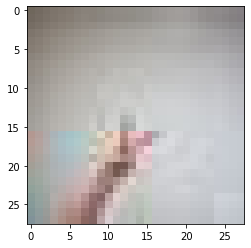

In [16]:
# 맞는 지 시각화

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [21]:
# 딥러닝 네트워크 설계

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

inputs = layers.Input((28, 28, 3), name = 'input_layer')

# Feature Extraction
net = layers.Conv2D(32, (3, 3), padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D((2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D((2, 2))(net)
net = layers.Dropout(0.5)(net)

# Classification
net = layers.Flatten()(net)  
net = layers.Dense(128)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.4)(net)
net = layers.Dense(10)(net)  

net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs=net, name='rcp_CNN')
# estimator = tf.keras.estimator.model_to_estimator(model)
# 위에 처럼 만든 모델을 에스티메이터로 바꾸고 싶을때는 이렇게

model.summary()

Model: "rcp_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 64)        0   

In [22]:
# 딥러닝 네트워크 학습

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

# 채널 수에 대한 정보 (RGB=3)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=30)

Epoch 1/30
85/85 [==============================] - 0s 2ms/step - loss: 1.1848 - accuracy: 0.3515
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4056
Epoch 3/30
85/85 [==============================] - 0s 4ms/step - loss: 0.9805 - accuracy: 0.5107
Epoch 4/30
85/85 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.6081
Epoch 5/30
85/85 [==============================] - 0s 3ms/step - loss: 0.7409 - accuracy: 0.6681
Epoch 6/30
85/85 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.7181
Epoch 7/30
85/85 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7515
Epoch 8/30
85/85 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7930
Epoch 9/30
85/85 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.8226
Epoch 10/30
85/85 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.8393
Epoch 11/30
85/85 [

In [19]:
# 딥러닝 test 데이터 만들기

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def re_load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)= re_load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [20]:
# 모델평가

# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 782.7782 - accuracy: 0.3667
test_loss: 782.7781982421875 
test_accuracy: 0.36666667461395264
